# Sales Data Analysis

This notebook performs full data cleaning and exploratory analysis on messy sales data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('../data/raw_sales_data.csv')
df.head()

,Date,Region,Product,Units Sold,Unit Price
0,2024-04-22,NaN,Phone,5.0,1000.0
1,NaN,West,NaN,9999.0,120.5
2,NaN,South,NaN,1.0,250.0
3,2024-03-18,West,NaN,1.0,5.0
4,2024-02-07,NaN,NaN,15.0,5.0


## Step 1: Inspect missing values and duplicates

In [2]:
# Check missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Date            6
Region         23
Product        36
Units Sold     19
Unit Price     15
dtype: int64
Duplicate rows: 2


## Step 2: Clean the data

In [3]:
# Drop rows with missing date
df = df.dropna(subset=['Date'])

# Strip column names
df.columns = df.columns.str.strip()

# Remove duplicates
df = df.drop_duplicates()

# Fill missing values or drop
df['Region'] = df['Region'].fillna('Unknown')
df['Product'] = df['Product'].replace('', 'Unknown').fillna('Unknown')
df = df.dropna(subset=['Units Sold', 'Unit Price'])

# Convert data types
df['Date'] = pd.to_datetime(df['Date'])
df['Units Sold'] = df['Units Sold'].astype(int)
df['Unit Price'] = df['Unit Price'].astype(float)

# Calculate revenue
df['Total Revenue'] = (df['Units Sold'] * df['Unit Price']).round(2)
df.head()

,Date,Region,Product,Units Sold,Unit Price,Total Revenue
0,2024-04-22,Unknown,Phone,5,1000.00,5000.00
3,2024-03-18,West,Unknown,1,5.00,5.00
4,2024-02-07,Unknown,Unknown,15,5.00,75.00
5,2024-04-24,North,Unknown,0,120.50,0.00
6,2024-02-14,South,Unknown,15,499.99,7499.85


## Step 3: EDA – Revenue by Region and Product

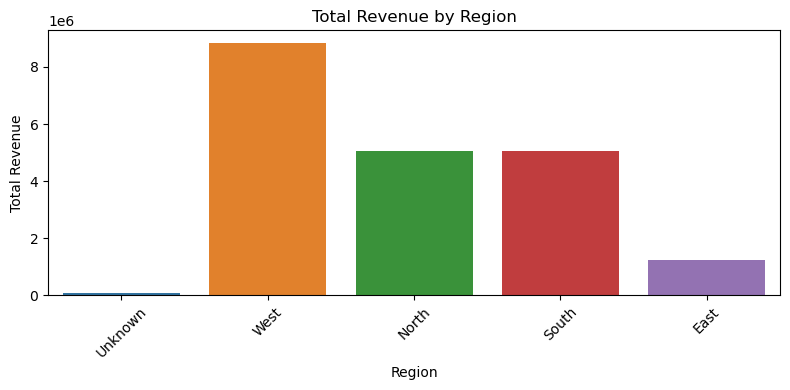

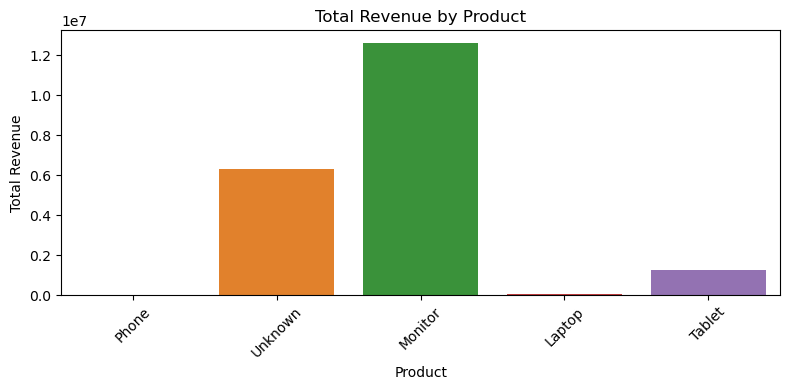

In [5]:
# Revenue by Region
plt.figure(figsize=(8,4))
sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum,errorbar=None)
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Product
plt.figure(figsize=(8,4))
sns.barplot(x='Product', y='Total Revenue', data=df, estimator=sum, errorbar=None)
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()